# ID3

# ID3 from scratch

In [43]:
import pandas as pd
import numpy as np

| CGPA | Interactive | Practical Knowledge | Communication Skills | Job Offer |
|------|-------------|---------------------|----------------------|-----------|
| >=9  | Yes         | Very Good           | Good                 | Yes       |
| >=8  | No          | Good                | Moderate             | Yes       |
| >=9  | No          | Average             | Poor                 | No        |
| <8   | No          | Average             | Good                 | No        |
| >=8  | Yes         | Good                | Moderate             | Yes       |
| >=9  | Yes         | Good                | Moderate             | Yes       |
| <8   | Yes         | Good                | Poor                 | No        |
| >=9  | No          | Very Good           | Good                 | Yes       |
| >=8  | Yes         | Good                | Good                 | Yes       |
| >=8  | Yes         | Average             | Good                 | Yes       |


In [44]:
train_data_m = pd.read_csv("https://raw.githubusercontent.com/mohammed1916/ml/main/Datasets/JobOffer.csv")
test_data_m = pd.read_csv("https://raw.githubusercontent.com/mohammed1916/ml/main/Datasets/JobOfferTest.csv")

In [45]:
train_data_m

,CGPA,Interactive,Practical Knowledge,Communication Skills,Job Offer
0,>=9,Yes,Very Good,Good,Yes
1,>=8,No,Good,Moderate,Yes
2,>=9,No,Average,Poor,No
3,<8,No,Average,Good,No
4,>=8,Yes,Good,Moderate,Yes
5,>=9,Yes,Good,Moderate,Yes
6,<8,Yes,Good,Poor,No
7,>=9,No,Very Good,Good,Yes
8,>=8,Yes,Good,Good,Yes
9,>=8,Yes,Average,Good,Yes


In [46]:
column_values = {
    'CGPA': ['<8', '>=8', '>=9'],
    'Interactive': ['Yes', 'No'],
    'Practical Knowledge': ['Average', 'Good', 'Very Good'],
    'Communication Skills': ['Poor', 'Moderate', 'Good'],
    'Job Offer': ['Yes', 'No']
}


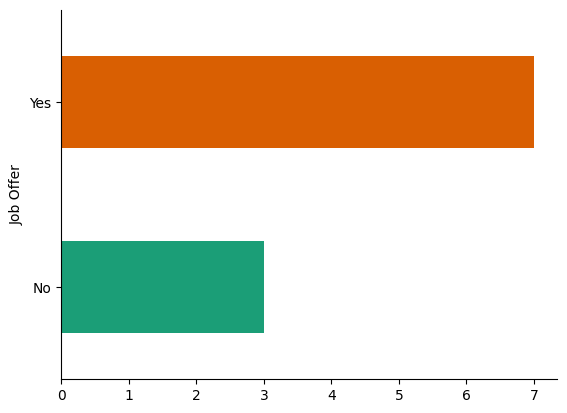

In [47]:
# @title Job Offer

from matplotlib import pyplot as plt
import seaborn as sns
train_data_m.groupby('Job Offer').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/var/folders/27/4mnqsjx93_z53csjqkjr4yr00000gn/T/ipykernel_25858/29224335.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(train_data_m, x='Practical Knowledge', y='Job Offer', inner='stick', palette='Dark2')


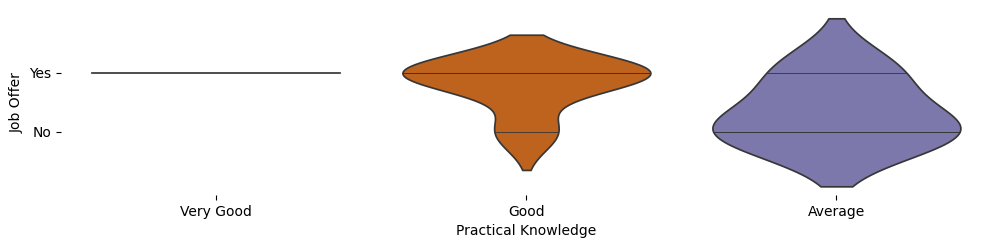

In [48]:
# @title Job Offer vs Practical Knowledge

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(train_data_m['Job Offer'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(train_data_m, x='Practical Knowledge', y='Job Offer', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [49]:
def calc_entropy_info(feature_name,train_data, label, class_list):
    print(f"\t\t{'-'*10}")
    print(f"\t\tStart Target Entropy calculation")
    print(f"\t\tfeature_name {feature_name}")
    print(f"\t\tlabel {label}")
    print(f"\t\tclass_list {class_list}")
    print(f"\t\t{'-'*10}")
    total_row = train_data.shape[0]
    print(f"\t\tTotal Row: {total_row}")
    total_entr = 0

    for c in class_list:
        print(f"\n\t\ttrain_data[label]\n")
        for i in train_data[label]:
            print(f"\t\t\t{i}")
        print(f"\t\tc {c}")
        total_class_count = train_data[train_data[label] == c].shape[0]
        print(f"\t\tTotal Class Count: {total_class_count}")
        total_class_entr = - (total_class_count/total_row)*np.log2(total_class_count/total_row)
        print(f"\t\t- ({total_class_count}/{total_row})*np.log2({total_class_count}/{total_row})")
        print(f"\t\tTotal Class Entropy: {total_class_entr}")
        total_entr += total_class_entr

    print(f"\t\tTotal Entropy: {total_entr}")
    print(f"\t\t{'-'*10}")
    print(f"\t\tEND Target Entropy calculation")
    print(f"\t\t{'-'*10}")
    print("\n"*2)
    return total_entr

In [50]:
def calc_entropy(feature_name,feature_value_data, label, class_list):
    print("\t\t\t\t"," *"*10)
    print("\t\t\t\tStart Entropy calculation")
    print('\t\t\t\tfeature_name', feature_name)
    print('\t\t\t\tlabel', label)
    print('\t\t\t\tclass_list', class_list)
    print("\t\t\t\t"," *"*10)
    class_count = feature_value_data.shape[0]
    entropy = 0

    for c in class_list:
        label_class_count = feature_value_data[feature_value_data[label] == c].shape[0]
        print(f"\n\t\t\tc: {c}")
        entropy_class = 0
        if label_class_count != 0:
            probability_class = label_class_count/class_count
            entropy_class = - probability_class * np.log2(probability_class)
            print(f"\t\t\t\t-{label_class_count}/{class_count}*np.log2({label_class_count}/{class_count})")
        else:
            print(f"\t\t\t\t-{label_class_count}/{class_count}*np.log2({label_class_count}/{class_count})")
        
        print("\t\t\t\tentropy_class: ",entropy_class)
        entropy += entropy_class
    print("\n\t\t\t\tentropy: ",entropy)
    print("\t\t\t\t","*"*10)
    print("\t\t\t\tEND Entropy calculation")
    print("\t\t\t\t","*"*10)
    print("\n"*2)
    return entropy

In [51]:
def calc_info_gain(feature_name, train_data, label, class_list):
    feature_value_list = train_data[feature_name].unique()
    total_row = train_data.shape[0]
    entropy_feature_info = 0.0

    for feature_value in feature_value_list:
        feature_value_data = train_data[train_data[feature_name] == feature_value]
        feature_value_count = feature_value_data.shape[0]
        feature_value_entropy = calc_entropy(feature_value,feature_value_data, label, class_list)
        feature_value_probability = feature_value_count/total_row
        entropy_feature_info += feature_value_probability * feature_value_entropy

        # Print debug lines
        print("\t\t\t\t\t\t\t\t","@"*10)
        print("\t\t\t\t\t\t\t\tcalc_info_gain")
        print("\t\t\t\t\t\t\t\tFeature Value:", feature_value)
        print("\t\t\t\t\t\t\t\tFeature Value Count:", feature_value_count)
        print("\t\t\t\t\t\t\t\tFeature Value Entropy:", feature_value_entropy)
        print("\t\t\t\t\t\t\t\tFeature Value Probability:", feature_value_probability)
        print("\t\t\t\t\t\t\t\t","@"*10)
    print("\t\t\t\t\t\t\t\t","@-"*10)
    print("\t\t\t\t\t\t\t\tEntropy Feature Info:", entropy_feature_info)
    print("\t\t\t\t\t\t\t\t","@-"*10)
    print("\n"*2)

    return calc_entropy_info(feature_name,train_data, label, class_list) - entropy_feature_info

In [52]:
def find_most_informative_feature(train_data, label, class_list):
    feature_list = train_data.columns.drop(label)
    max_info_gain = -1
    max_info_feature = None

    for feature in feature_list:
        print("\n"*2)
        print("/"*10)
        print("find_most_informative_feature")
        print("Feature:", feature)
        feature_info_gain = calc_info_gain(feature, train_data, label, class_list)
        if max_info_gain < feature_info_gain:
            max_info_gain = feature_info_gain
            max_info_feature = feature

        # Print debug lines
        print("Feature Info Gain:", feature_info_gain)
        print("Max Info Gain:", max_info_gain)
        print("Max Info Feature:", max_info_feature)
        print("\\"*10)

    return max_info_feature

In [53]:
def generate_sub_tree(feature_name, train_data, label, class_list):
    feature_value_count_dict = train_data[feature_name].value_counts(sort=False)
    tree = {}

    for feature_value, count in feature_value_count_dict.items():
        feature_value_data = train_data[train_data[feature_name] == feature_value]

        assigned_to_node = False
        for c in class_list:
            class_count = feature_value_data[feature_value_data[label] == c].shape[0]

            if class_count == count:
                tree[feature_value] = c
                train_data = train_data[train_data[feature_name] != feature_value]
                assigned_to_node = True
        if not assigned_to_node:
            tree[feature_value] = "?"

        # Print debug lines
        print("\n"*2)
        print("%%%%%", " >"*10)
        print("%%%%%", " Generating Sub Tree")
        print("%%%%%", " Feature Value:", feature_value)
        print("%%%%%", " Count:", count)
        print("%%%%%", " Tree:", tree)
        print("%%%%%", " Train Data:")
        # for d in train_data.values:
        #     print(f"\t\t\t\t\t\t\t\t {d}")
        print(f"{train_data}")
        print("%%%%%", " <"*10)

    return tree, train_data

In [54]:
def make_tree(root, prev_feature_value, train_data, label, class_list):
    if train_data.shape[0] != 0:
        max_info_feature = find_most_informative_feature(train_data, label, class_list)
        tree, train_data = generate_sub_tree(max_info_feature, train_data, label, class_list)
        next_root = None

        if prev_feature_value != None:
            root[prev_feature_value] = dict()
            root[prev_feature_value][max_info_feature] = tree
            next_root = root[prev_feature_value][max_info_feature]
        else:
            root[max_info_feature] = tree
            next_root = root[max_info_feature]

        for node, branch in list(next_root.items()):
            if branch == "?":
                feature_value_data = train_data[train_data[max_info_feature] == node]
                print("Debug Line: Feature Value:", node)
                print("Debug Line: Branch:", branch)
                print("Debug Line: Feature Value Data:")
                print(feature_value_data)
                make_tree(next_root, node, feature_value_data, label, class_list)

In [55]:
def id3(train_data_m, label):
    train_data = train_data_m.copy()
    tree = {}
    class_list = train_data[label].unique() # ['Yes', 'No']
    make_tree(tree, None, train_data, label, class_list)

    return tree

In [56]:
tree = id3(train_data_m, 'Job Offer')




//////////
find_most_informative_feature
Feature: CGPA
				  * * * * * * * * * *
				Start Entropy calculation
				feature_name >=9
				label Job Offer
				class_list ['Yes' 'No']
				  * * * * * * * * * *

			c: Yes
				-3/4*np.log2(3/4)
				entropy_class:  0.31127812445913283

			c: No
				-1/4*np.log2(1/4)
				entropy_class:  0.5

				entropy:  0.8112781244591328
				 **********
				END Entropy calculation
				 **********



								 @@@@@@@@@@
								calc_info_gain
								Feature Value: >=9
								Feature Value Count: 4
								Feature Value Entropy: 0.8112781244591328
								Feature Value Probability: 0.4
								 @@@@@@@@@@
				  * * * * * * * * * *
				Start Entropy calculation
				feature_name >=8
				label Job Offer
				class_list ['Yes' 'No']
				  * * * * * * * * * *

			c: Yes
				-4/4*np.log2(4/4)
				entropy_class:  -0.0

			c: No
				-0/4*np.log2(0/4)
				entropy_class:  0

				entropy:  0.0
				 **********
				END Entropy calculation
				 **********



								 @

In [57]:
tree

{'CGPA': {'>=9': {'Practical Knowledge': {'Very Good': 'Yes',
    'Average': 'No',
    'Good': 'Yes'}},
  '>=8': 'Yes',
  '<8': 'No'}}

In [58]:
def print_tree(tree, indent=0):
    for key, value in tree.items():
        if isinstance(value, dict):
            print("  " * indent + f"{key}:")
            print_tree(value, indent + 1)
        else:
            print("  " * indent + f"{key}: {value}")

print_tree(tree)

CGPA:
  >=9:
    Practical Knowledge:
      Very Good: Yes
      Average: No
      Good: Yes
  >=8: Yes
  <8: No


# Using Libraries

In [59]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import pandas as pd

iris = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")

features = iris.drop("species", axis=1)
target = iris["species"]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(criterion="entropy")

clf = clf.fit(X_train.values, y_train.values)

new_flower = [[5, 2.7, 1, 0.2]]
prediction = clf.predict(new_flower)

print(prediction)


['setosa']


Accuracy: 1.0


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


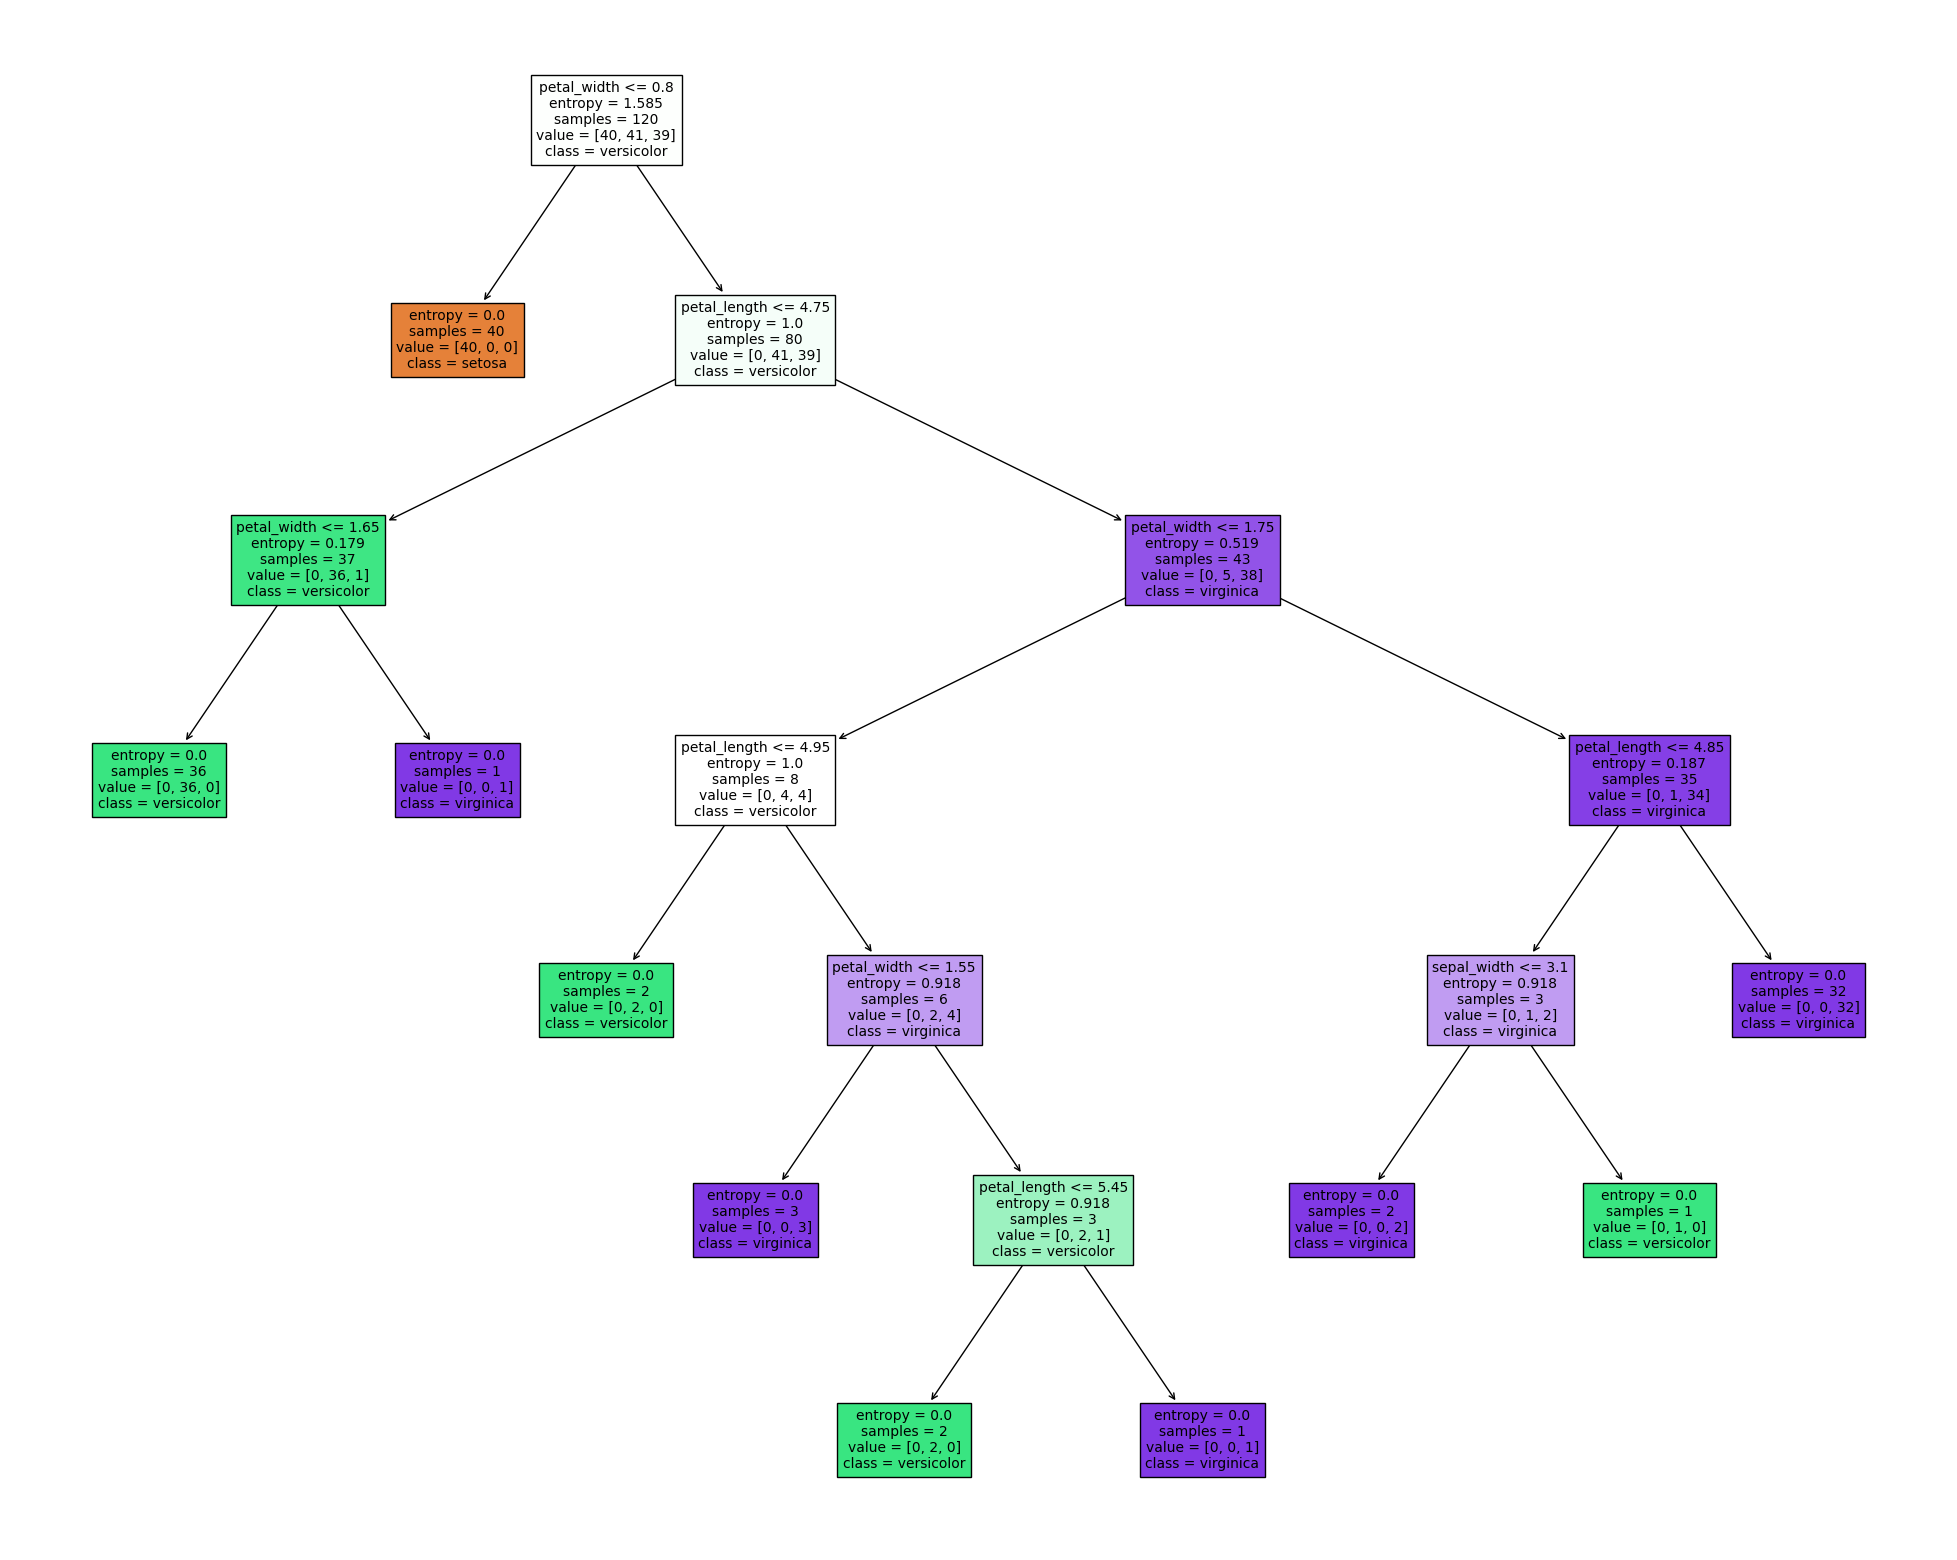

In [60]:
from sklearn.metrics import accuracy_score
predictions = clf.predict(features)
accuracy = accuracy_score(target, predictions)
print("Accuracy:", accuracy)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25, 20))
tree.plot_tree(clf, feature_names=features.columns, class_names=target.unique(), fontsize=10, filled=True)
plt.show()


# C4.5

## From Scratch

In [61]:
import pandas as pd
import numpy as np
from collections import Counter
import math

class Node:
    def __init__(self, data):
        self.data = data
        self.children = {}
        self.attribute = None
        self.split_value = None
        self.label = None

def entropy(data):
    if len(data) == 0:
        return 0
    label_counts = Counter(data[:, -1])
    entropy = 0
    for count in label_counts.values():
        p = count / len(data)
        entropy -= p * math.log2(p)
    return entropy

def information_gain(data, attribute_index, split_value):
    left_data = data[data[:, attribute_index] <= split_value]
    right_data = data[data[:, attribute_index] > split_value]
    total_instances = len(data)
    left_instances = len(left_data)
    right_instances = len(right_data)
    return entropy(data) - (left_instances / total_instances) * entropy(left_data) - (right_instances / total_instances) * entropy(right_data)

def select_best_split(data):
    best_gain = -1
    best_attribute = None
    best_split_value = None
    num_attributes = data.shape[1] - 1
    for attribute_index in range(num_attributes):
        attribute_values = data[:, attribute_index]
        unique_values = np.unique(attribute_values)
        for value in unique_values:
            gain = information_gain(data, attribute_index, value)
            if gain > best_gain:
                best_gain = gain
                best_attribute = attribute_index
                best_split_value = value
    return best_attribute, best_split_value

def build_tree(data, max_depth):
    if len(set(data[:, -1])) == 1:
        leaf = Node(data)
        leaf.label = data[0, -1]
        return leaf
    if max_depth == 0:
        leaf = Node(data)
        leaf.label = Counter(data[:, -1]).most_common(1)[0][0]
        return leaf
    best_attribute, best_split_value = select_best_split(data)
    node = Node(data)
    node.attribute = best_attribute
    node.split_value = best_split_value
    left_data = data[data[:, best_attribute] <= best_split_value]
    right_data = data[data[:, best_attribute] > best_split_value]
    if len(left_data) == 0 or len(right_data) == 0:
        node.label = Counter(data[:, -1]).most_common(1)[0][0]
        return node
    node.children['True'] = build_tree(left_data, max_depth - 1)
    node.children['False'] = build_tree(right_data, max_depth - 1)
    return node

def classify_instance(instance, tree):
    if tree.label is not None:
        return tree.label
    attribute = tree.attribute
    split_value = tree.split_value
    if instance[attribute] <= split_value:
        return classify_instance(instance, tree.children['True'])
    else:
        return classify_instance(instance, tree.children['False'])

In [62]:
train_data = train_data_m
for col in train_data.columns[:-1]:
    train_data[col] = train_data[col].astype('category').cat.codes

train_data_np = train_data.to_numpy()
print(train_data_np)
tree = build_tree(train_data_np, max_depth=4)

instance = np.array([2, 1, 0, 1])  #  (>=9, Yes, Average, Moderate)

classification = classify_instance(instance, tree)
print("Predicted class:", classification)

[[2 1 2 0 'Yes']
 [1 0 1 1 'Yes']
 [2 0 0 2 'No']
 [0 0 0 0 'No']
 [1 1 1 1 'Yes']
 [2 1 1 1 'Yes']
 [0 1 1 2 'No']
 [2 0 2 0 'Yes']
 [1 1 1 0 'Yes']
 [1 1 0 0 'Yes']]
Predicted class: Yes


In [63]:
names = ['CGPA',	'Interactive',	'Practical Knowledge',	'Communication Skills']

In [64]:
    'Practical Knowledge': ['Average', 'Good', 'Very Good'],
    'Communication Skills': ['Poor', 'Moderate', 'Good'],
    'Job Offer': ['Yes', 'No']
}


SyntaxError: unmatched '}' (1522765128.py, line 4)

In [ ]:
def print_tree(node, depth=0):
    indent = "  " * depth
    if node.label is not None:
        print(indent + "Leaf:", node.label)
        return
    print(indent + f"Attribute: {node.attribute}, Split Value: {node.split_value}")
    for condition, child in node.children.items():
        print(indent + f"If {condition}:")
        print_tree(child, depth + 1)

print_tree(tree)


Attribute: 0, Split Value: 0
If True:
  Leaf: No
If False:
  Attribute: 3, Split Value: 1
  If True:
    Leaf: Yes
  If False:
    Leaf: No


Mapping Attributes to values

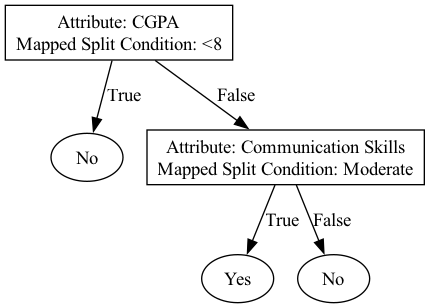

In [ ]:
from graphviz import Digraph

def visualize_tree(node, graph=None):
    if graph is None:
        graph = Digraph()
    if node.label is not None:
        graph.node(str(id(node)), label=str(node.label), shape='oval')
        return graph
    graph.node(str(id(node)), label=f"Attribute: {names[node.attribute]}\nMapped Split Condition: {column_values[names[node.attribute]][node.split_value]}", shape='box')
    for condition, child in node.children.items():
        child_graph = visualize_tree(child, graph)
        graph.edge(str(id(node)), str(id(child)), label=condition)
    return graph

tree_graph = visualize_tree(tree)

tree_graph.render('decision_tree', format='png', cleanup=True)

from IPython.display import Image
Image('decision_tree.png')


## Using Libraries

In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import pandas as pd

iris = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")

features = iris.drop("species", axis=1)
target = iris["species"]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()

clf = clf.fit(X_train.values, y_train.values)

new_flower = [[5, 2.7, 1, 0.2]]
prediction = clf.predict(new_flower)

print(prediction)

['setosa']


Accuracy: 1.0


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


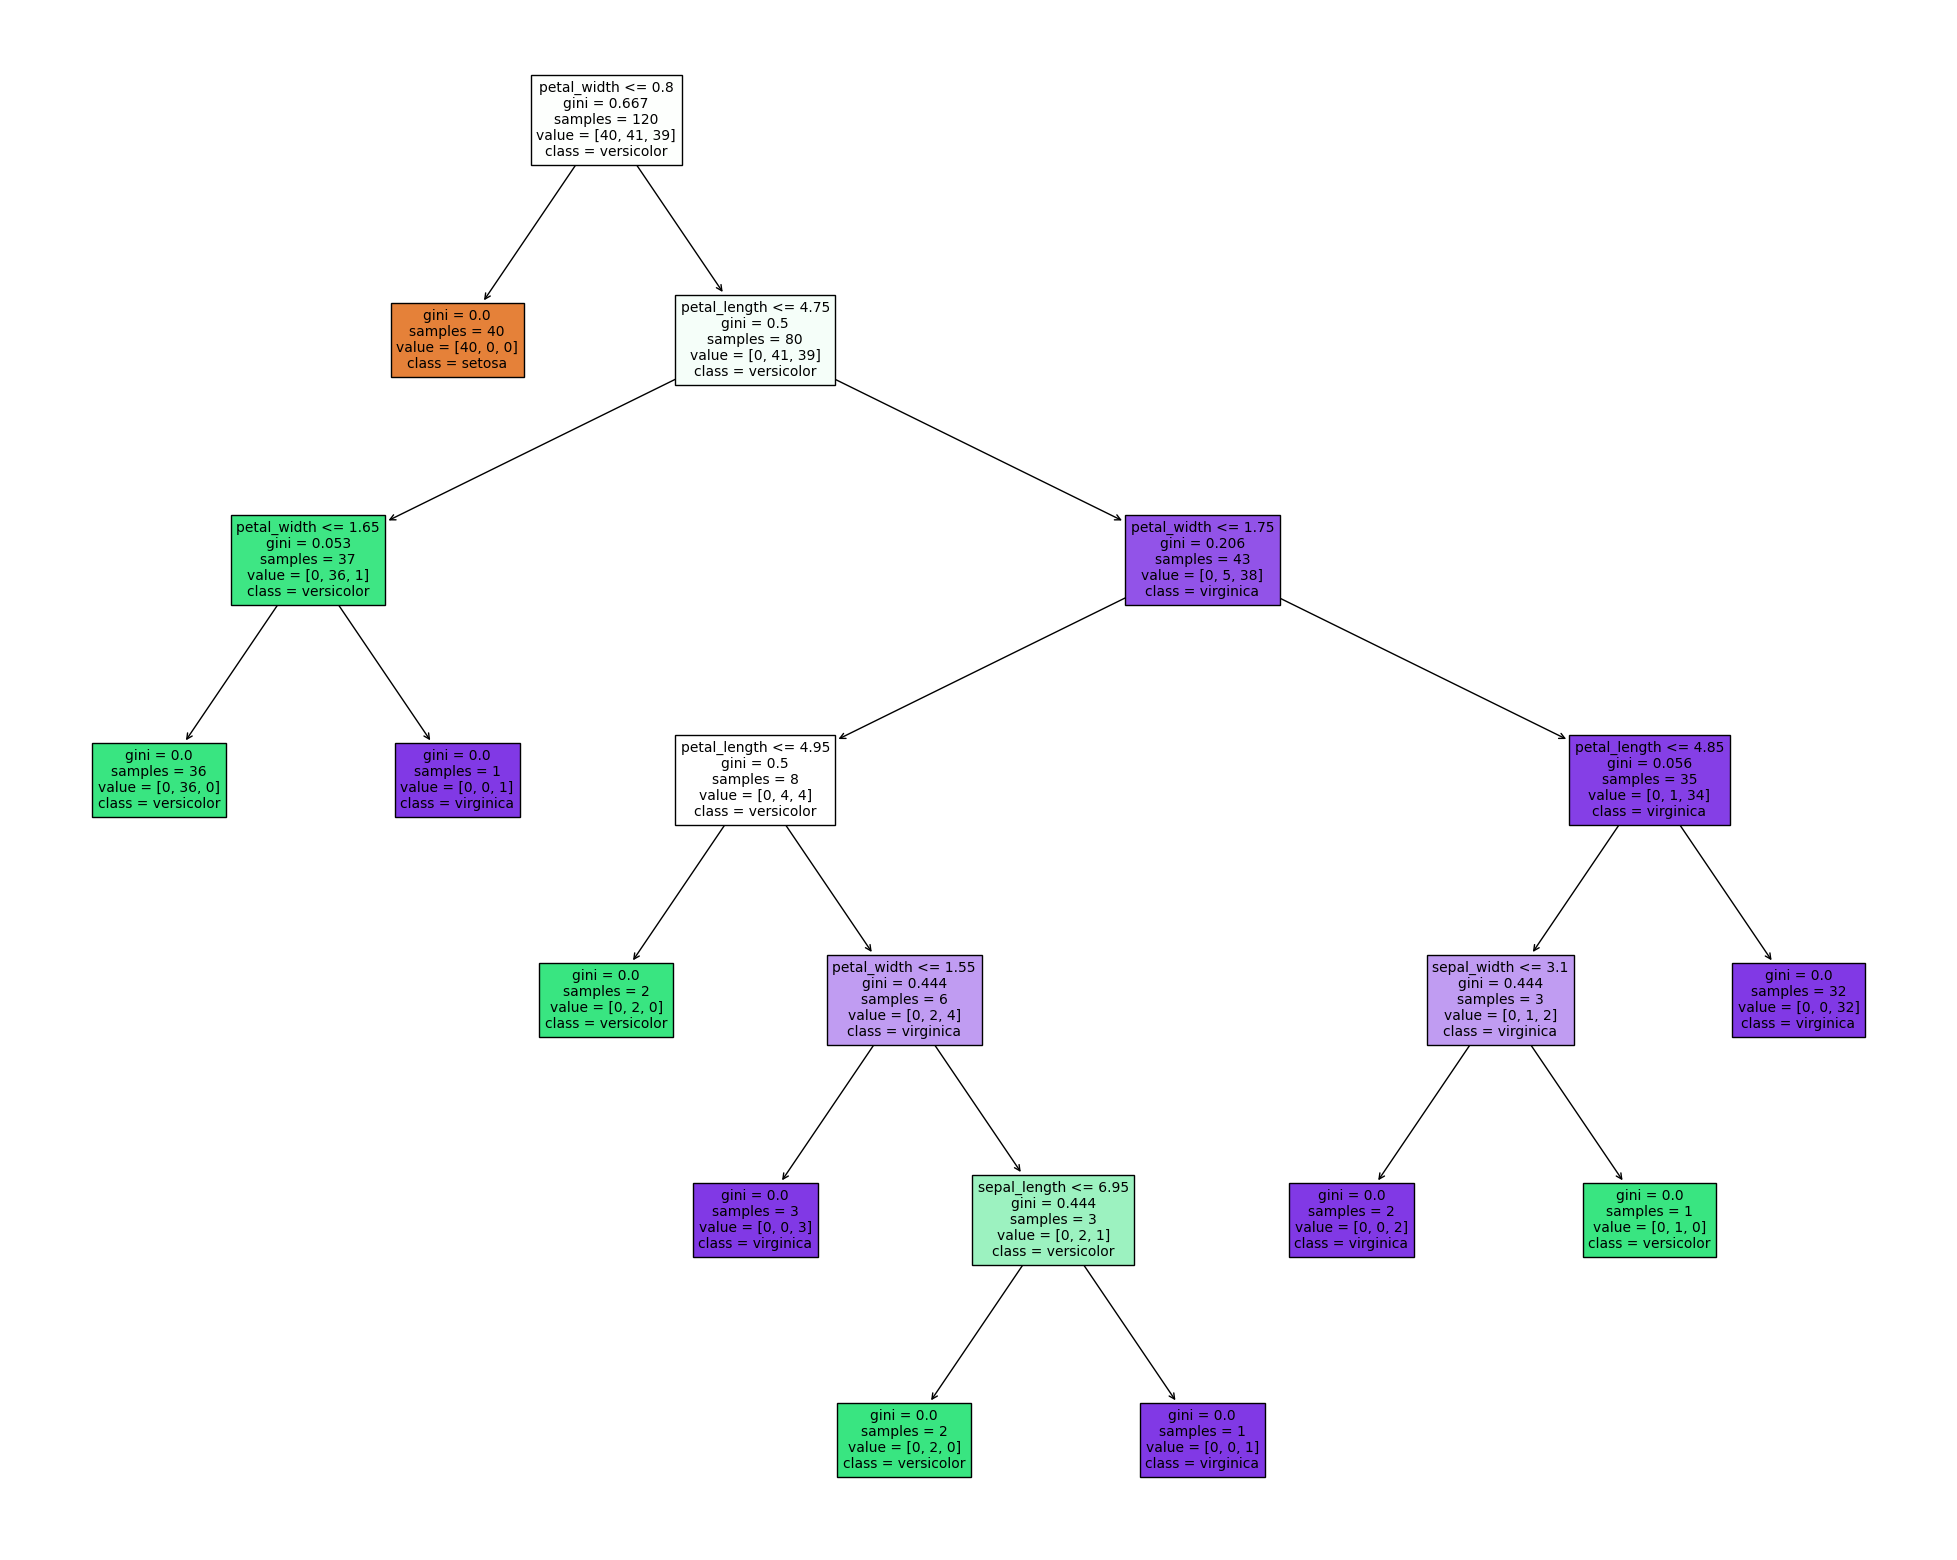

In [ ]:
from sklearn.metrics import accuracy_score
predictions = clf.predict(features)
accuracy = accuracy_score(target, predictions)
print("Accuracy:", accuracy)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25, 20))
tree.plot_tree(clf, feature_names=features.columns, class_names=target.unique(), fontsize=10, filled=True)
plt.show()
